In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [312]:
# import covid infection data from germany
# obtained from Robert Koch Institut (RKI)
# data licensed under DL-DE->BY-2.0
# http://www.govdata.de/dl-de/by-2-0

df = pd.read_csv('RKI_COVID19.csv')
df.head()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00,1001,"17.11.2020, 00:00 Uhr",0,-9,2020/09/30 00:00:00,0,1,0,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00,1001,"17.11.2020, 00:00 Uhr",0,-9,2020/10/29 00:00:00,0,1,0,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00,1001,"17.11.2020, 00:00 Uhr",0,-9,2020/11/03 00:00:00,1,1,0,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020/08/24 00:00:00,1001,"17.11.2020, 00:00 Uhr",0,-9,2020/08/24 00:00:00,0,1,0,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020/09/26 00:00:00,1001,"17.11.2020, 00:00 Uhr",0,-9,2020/09/26 00:00:00,0,1,0,Nicht übermittelt


In [310]:
#Translation of column names to english
df.rename(columns={"IdBundesland": "IdState", "Bundesland":"State", "Landkreis":"County", "Altersgruppe":"AgeGroup", 
                   "Geschlecht":"Sex", "AnzahlFall":"CaseNumber", "AnzahlTodesfall":"DeathNumber", 
                  "Meldedatum":"DateOfNotice", "IdLandkreis":"IdCounty", "Datenstand":"LastUpdated", 
                   "NeuerFall":"NewCase", "NeuerTodesfall":"NewDeath", "Refdatum":"ReferenceDate", "NeuGenesen":"NewRecovered", 
                   "AnzahlGenesen":"RecoveredNumber", "IstErkrankungsbeginn":"IsDayofSickening", "Altersgruppe2":"AgeGroup2"
                  }, inplace=True)

# drop redundant data and columns w/o relevant information for this project
try:
    df.drop(labels=["FID", "State", "County", "LastUpdated", "AgeGroup2", "NewCase", "NewDeath", "NewRecovered", "RecoveredNumber"], axis=1, inplace=True)
except Exception:
    pass

In [311]:
df.head()

,IdState,AgeGroup,Sex,CaseNumber,DeathNumber,DateOfNotice,IdCounty,ReferenceDate,IsDayofSickening
0,1,A00-A04,M,1,0,2020/09/30 00:00:00,1001,2020/09/30 00:00:00,0
1,1,A00-A04,M,1,0,2020/10/29 00:00:00,1001,2020/10/29 00:00:00,0
2,1,A00-A04,M,1,0,2020/11/03 00:00:00,1001,2020/11/03 00:00:00,0
3,1,A00-A04,W,1,0,2020/08/24 00:00:00,1001,2020/08/24 00:00:00,0
4,1,A00-A04,W,1,0,2020/09/26 00:00:00,1001,2020/09/26 00:00:00,0


In [50]:
type(df['DateOfNotice'][0])

str

In [53]:
df_new = df.copy()

In [59]:
df_new['DateOfNotice'] = pd.to_datetime(df_new['DateOfNotice'], yearfirst=True)
df_new['ReferenceDate'] = pd.to_datetime(df_new['ReferenceDate'], yearfirst=True)

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481678 entries, 0 to 481677
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   IdState           481678 non-null  int64         
 1   AgeGroup          481678 non-null  object        
 2   Sex               481678 non-null  object        
 3   CaseNumber        481678 non-null  int64         
 4   DeathNumber       481678 non-null  int64         
 5   DateOfNotice      481678 non-null  datetime64[ns]
 6   IdCounty          481678 non-null  int64         
 7   NewCase           481678 non-null  int64         
 8   NewDeath          481678 non-null  int64         
 9   ReferenceDate     481678 non-null  object        
 10  NewRecovered      481678 non-null  int64         
 11  RecoveredNumber   481678 non-null  int64         
 12  IsDayofSickening  481678 non-null  int64         
dtypes: datetime64[ns](1), int64(9), object(3)
memory usage: 47.

In [57]:
df_new.head()

,IdState,AgeGroup,Sex,CaseNumber,DeathNumber,DateOfNotice,IdCounty,NewCase,NewDeath,ReferenceDate,NewRecovered,RecoveredNumber,IsDayofSickening
0,1,A00-A04,M,1,0,2020-09-30,1001,0,-9,2020/09/30 00:00:00,0,1,0
1,1,A00-A04,M,1,0,2020-10-29,1001,0,-9,2020/10/29 00:00:00,0,1,0
2,1,A00-A04,M,1,0,2020-11-03,1001,0,-9,2020/11/03 00:00:00,1,1,0
3,1,A00-A04,W,1,0,2020-08-24,1001,0,-9,2020/08/24 00:00:00,0,1,0
4,1,A00-A04,W,1,0,2020-09-26,1001,0,-9,2020/09/26 00:00:00,0,1,0


In [63]:
df_new[df_new['IdCounty']==1001]

,IdState,AgeGroup,Sex,CaseNumber,DeathNumber,DateOfNotice,IdCounty,NewCase,NewDeath,ReferenceDate,NewRecovered,RecoveredNumber,IsDayofSickening
0,1,A00-A04,M,1,0,2020-09-30,1001,0,-9,2020-09-30,0,1,0
1,1,A00-A04,M,1,0,2020-10-29,1001,0,-9,2020-10-29,0,1,0
2,1,A00-A04,M,1,0,2020-11-03,1001,0,-9,2020-11-03,1,1,0
3,1,A00-A04,W,1,0,2020-08-24,1001,0,-9,2020-08-24,0,1,0
4,1,A00-A04,W,1,0,2020-09-26,1001,0,-9,2020-09-26,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,A80+,M,1,1,2020-03-31,1001,0,0,2020-03-21,-9,0,1
249,1,A80+,W,1,0,2020-03-30,1001,0,-9,2020-03-26,0,1,1
250,1,NaN,M,2,0,2020-10-30,1001,0,-9,2020-10-30,-9,0,0
251,1,NaN,NaN,1,0,2020-11-02,1001,0,-9,2020-10-28,-9,0,1


In [62]:
df_new.replace('unbekannt', np.nan, inplace=True)

In [65]:
df_new[df_new['IdCounty']==1001].sort_values(['DateOfNotice'])

,IdState,AgeGroup,Sex,CaseNumber,DeathNumber,DateOfNotice,IdCounty,NewCase,NewDeath,ReferenceDate,NewRecovered,RecoveredNumber,IsDayofSickening
137,1,A35-A59,M,1,0,2020-03-14,1001,0,-9,2020-03-16,0,1,1
178,1,A35-A59,W,1,0,2020-03-14,1001,0,-9,2020-03-10,0,1,1
81,1,A15-A34,W,1,0,2020-03-14,1001,0,-9,2020-03-12,0,1,1
23,1,A15-A34,M,1,0,2020-03-14,1001,0,-9,2020-03-16,0,1,1
83,1,A15-A34,W,1,0,2020-03-18,1001,0,-9,2020-03-15,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,A35-A59,M,1,0,2020-11-13,1001,0,-9,2020-11-08,-9,0,1
227,1,A35-A59,W,1,0,2020-11-13,1001,0,-9,2020-11-08,-9,0,1
136,1,A15-A34,W,1,0,2020-11-14,1001,0,-9,2020-11-11,-9,0,1
177,1,A35-A59,M,1,0,2020-11-15,1001,0,-9,2020-11-15,-9,0,0


<AxesSubplot:xlabel='DateOfNotice'>

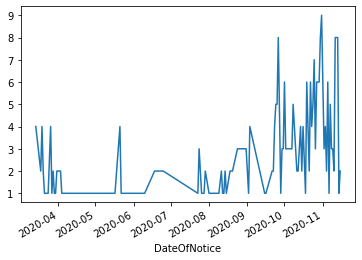

In [82]:
df_new[df_new['IdCounty']==1001].groupby('DateOfNotice', axis=0).sum()['CaseNumber'].plot()

In [287]:
ds_casenum = df_new.groupby('DateOfNotice', axis=0).sum()['CaseNumber'].rolling(window=7, center=True).mean()
#ds_casenum = ds_casenum[ds_casenum.index.month>2]
ds_casenum

DateOfNotice
2020-01-03             NaN
2020-01-13             NaN
2020-01-28             NaN
2020-01-29        2.428571
2020-01-31        2.428571
                  ...     
2020-11-12    17841.428571
2020-11-13    16778.571429
2020-11-14             NaN
2020-11-15             NaN
2020-11-16             NaN
Name: CaseNumber, Length: 279, dtype: float64

In [288]:
ds_casenumref = df_new[df_new['IsDayofSickening']==1].groupby('ReferenceDate', axis=0).sum()['CaseNumber'].rolling(window=7, center=True).mean()
#ds_casenumref = ds_casenumref[ds_casenumref.index.month>2]
ds_casenumref

ReferenceDate
2020-01-01            NaN
2020-01-02            NaN
2020-01-03            NaN
2020-01-04       5.285714
2020-01-06       2.571429
                 ...     
2020-11-12    2064.285714
2020-11-13    1425.428571
2020-11-14            NaN
2020-11-15            NaN
2020-11-16            NaN
Name: CaseNumber, Length: 318, dtype: float64

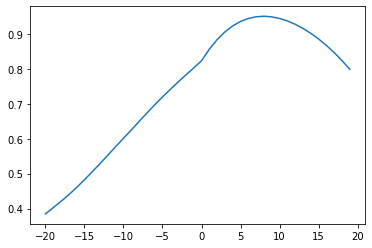

In [289]:
def cross_corr_shift(series1, series2, timeshift):
    return series1.corr(series2.shift(timeshift))

shift = np.arange(-20,20,1)

corr_shift = [cross_corr_shift(ds_casenum, ds_casenumref, t) for t in shift]

plt.plot(shift, corr_shift)

In [161]:
ds_deathnum = df_new.groupby('ReferenceDate', axis=0).sum()['DeathNumber'].rolling(window=7, center=True).mean()

In [295]:
shift[np.argmax(corr_shift)]

8

(0.0, 19298.028571428575)

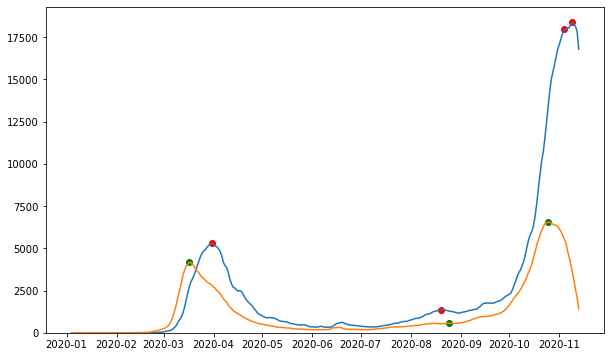

In [262]:
fig, ax = plt.subplots(figsize=(10,6))


ax.plot(ds_casenum.index, ds_casenum)
ax.plot(ds_casenumref.index, ds_casenumref)
ax.scatter(ds_casenum[peaks_casenum[0]].index, ds_casenum[peaks_casenum[0]], color='red')
ax.scatter(ds_casenumref[peaks_casenumref[0]].index, ds_casenumref[peaks_casenumref[0]], color='green')
ax.set_ylim(bottom=0)

In [165]:
ds_casenum.idxmax()

Timestamp('2020-11-09 00:00:00')

In [166]:
ds_casenumref.idxmax()

Timestamp('2020-10-25 00:00:00')

In [169]:
from scipy.signal import find_peaks

In [260]:
peaks_casenum = find_peaks(ds_casenum, threshold=5, prominence=50)
peaks_casenumref = find_peaks(ds_casenumref, threshold=2, prominence=30)

In [261]:
display(peaks_casenum[0])
display(peaks_casenumref[0])

array([ 48, 190, 266, 271])

array([ 73, 234, 295])

In [254]:
ds_casenum[peaks_casenum[0]]

DateOfNotice
2020-03-31     5287.142857
2020-04-17     2497.714286
2020-05-25      471.428571
2020-09-16     1761.000000
2020-09-18     1775.142857
2020-11-04    17970.142857
2020-11-09    18379.142857
Name: CaseNumber, dtype: float64

In [210]:
ds_casenum[peaks_casenum[0]].index

DatetimeIndex(['2020-03-31', '2020-06-20', '2020-08-20', '2020-11-04',
               '2020-11-09'],
              dtype='datetime64[ns]', name='DateOfNotice', freq=None)

In [211]:
ds_casenumref[peaks_casenumref[0]].index

DatetimeIndex(['2020-03-17', '2020-06-18', '2020-08-15', '2020-10-25'], dtype='datetime64[ns]', name='ReferenceDate', freq=None)

In [212]:
[31-17, 20-18, 20-15, 31+4-25]

[14, 2, 5, 10]

In [273]:
ds_casenum[ds_casenum.index.month>2].index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12', '2020-11-13', '2020-11-14',
               '2020-11-15', '2020-11-16'],
              dtype='datetime64[ns]', name='DateOfNotice', length=261, freq=None)